<h1>Project: United Kingdom Road Accident Data Analysis</h1>
<h3>Inclusive Years: 2019-2022</h3>
<p>Analyst: Jomarie Roperez</p>

<h1><strong>STEP 1:</strong> Import necessary libraries</h1>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

import matplotlib.pyplot as plt
import seaborn as sns


<h1><strong>STEP 1.1:</strong>Load dataset</h1>

In [2]:
uk_accident_data = pd.read_csv('data\\accident_data.csv')

<h1><strong>STEP 1.2:</strong>Create a copy for EDA (Preserve the original dataset)</h1>

In [3]:
eda_data = uk_accident_data.copy()


In [4]:
eda_data

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [6]:
eda_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


<h1><strong>STEP 2:</strong> Check for Missing Values</h1>

In [7]:
eda_data.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1><strong>STEP 3:</strong>Handle Missing Values(still in Progress)</h1>

In [8]:
eda_data.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [9]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [10]:
eda_data['Road_Surface_Conditions'] = eda_data['Road_Surface_Conditions'].fillna('Unknown road condition')

eda_data['Latitude'] = eda_data['Latitude'].fillna(eda_data['Latitude'].mode()[0])
eda_data['Longitude'] = eda_data['Longitude'].fillna(eda_data['Longitude'].mode()[0])
eda_data['Urban_or_Rural_Area'] = eda_data['Urban_or_Rural_Area'].fillna(eda_data['Urban_or_Rural_Area'].mode()[0])


eda_data['Road_Type'] = eda_data['Road_Type'].fillna('Unaccounted')
eda_data['Weather_Conditions'] = eda_data['Weather_Conditions'].fillna('Unaccounted')


In [11]:
eda_data.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1><strong>STEP 4:</strong> Exploring Categorical Columns</h1>

In [12]:
# # for object type
# categorical_columns = eda_data.select_dtypes(include=['object']).columns
# categorical_columns


In [13]:
# # unique values for each categorical column
# for col in categorical_columns:
#     print(f"Unique values in '{col}':\n", eda_data[col].unique(), "\n")


In [14]:
# # Count unique values for each categorical column
# for col in categorical_columns:
#     print(f"Value counts for '{col}':\n", eda_data[col].value_counts(), "\n")


In [15]:
eda_data.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h1><strong>STEP 5:</strong>Data Type Conversion</h1>

In [16]:
# eda_data['Accident Date'] = pd.to_datetime(
#     eda_data['Accident Date'], 
#     dayfirst=True, 
#     errors='coerce'
#     )

In [17]:
# eda_data.isnull().sum()

In [18]:
eda_data['Accident Date'].unique()

array(['5/6/2019', '2/7/2019', '26-08-2019', ..., '26-12-2022',
       '25-07-2022', '25-12-2022'], dtype=object)

In [19]:
eda_data['Accident Date'] = eda_data['Accident Date'].astype('str')
eda_data.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [20]:
eda_data['Accident Date'] = eda_data['Accident Date'].str.strip()

In [21]:
eda_data['Accident Date'] = eda_data['Accident Date'].str.replace('/','-')

In [22]:
eda_data['Accident Date'] = pd.to_datetime(
    eda_data['Accident Date'], 
    dayfirst=True, 
    errors='coerce'
    )

In [23]:
eda_data.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1><strong>STEP 6:</strong>Categorization of columns</h1>

In [24]:
# category_columns = [
#     "Index",
#     "Accident_Severity",
#     "Light_Conditions",
#     "Weather_Conditions",
#     "Road_Surface_Conditions",
#     "Road_Type",
#     "Urban_or_Rural_Area",
#     "Vehicle_Type"
# ]
# eda_data[category_columns] = eda_data[category_columns].astype('category')


In [25]:
eda_data.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

<h1>Accidents</h1>

In [26]:
eda_data['Year'] =  eda_data['Accident Date'].dt.year
eda_data['Month'] =  eda_data['Accident Date'].dt.month
eda_data['Day'] =  eda_data['Accident Date'].dt.day

In [27]:
eda_data.columns


Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Year', 'Month', 'Day'],
      dtype='object')

In [28]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

In [29]:
#finding Categories

eda_data.select_dtypes(include=['object']).columns

Index(['Index', 'Accident_Severity', 'Light_Conditions', 'District Area',
       'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [30]:
eda_data['Accident_Severity'].unique()

array(['Serious', 'Slight', 'Fatal'], dtype=object)

In [31]:
cat_cols = ['Index', 'Accident_Severity', 'Light_Conditions', 'District Area',
       'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type']


In [32]:
# para madetermine kung category ba talaga
for col in cat_cols:
    print(f"Column: {col}")
    print(eda_data[col].unique())
    print('\n',"=" * 100,'\n')


Column: Index
['200701BS64157' '200701BS65737' '200701BS66127' ... '201091NM01935'
 '201091NM01964' '201091NM02142']


Column: Accident_Severity
['Serious' 'Slight' 'Fatal']


Column: Light_Conditions
['Darkness - lights lit' 'Daylight' 'Darkness - lighting unknown'
 'Darkness - lights unlit' 'Darkness - no lighting']


Column: District Area
['Kensington and Chelsea' 'Westminster' 'Richmond upon Thames'
 'Hammersmith and Fulham' 'Hounslow' 'Tower Hamlets' 'City of London'
 'Southwark' 'Camden' 'Hackney' 'Islington' 'Barnet' 'Brent' 'Haringey'
 'Merton' 'Ealing' 'Enfield' 'Greenwich' 'Newham'
 'London Airport (Heathrow)' 'Hillingdon' 'Waltham Forest' 'Redbridge'
 'Barking and Dagenham' 'Bromley' 'Havering' 'Croydon' 'Lambeth'
 'Wandsworth' 'Sutton' 'Bexley' 'Lewisham' 'Harrow' 'Kingston upon Thames'
 'Barrow-in-Furness' 'South Lakeland' 'Carlisle' 'Eden' 'Allerdale'
 'Copeland' 'Fylde' 'Blackpool' 'Wyre' 'Lancaster' 'Chorley'
 'West Lancashire' 'South Ribble' 'Preston' 'Blackburn with D

In [33]:
eda_data[cat_cols] = eda_data[cat_cols].astype('category')


In [34]:
eda_data.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
dtype: object

In [35]:
uk_data_2019 = eda_data[eda_data['Year'] == 2019]
uk_data_2020 = eda_data[eda_data['Year'] == 2020]
uk_data_2021 = eda_data[eda_data['Year'] == 2021]
uk_data_2022 = eda_data[eda_data['Year'] == 2022]

# Q1: What is the most common road surface condition during accidents?


In [36]:
most_common_rfc = eda_data['Road_Surface_Conditions'].value_counts()
most_common_rfc

Road_Surface_Conditions
Dry                       447821
Wet or damp               186708
Frost or ice               18517
Snow                        5890
Flood over 3cm. deep        1017
Unknown road condition       726
Name: count, dtype: int64

<h1><b>Insights on Road Surface Conditions and Accidents</b></h1>

<ol>
    <li><b>Most Accidents Occur on Dry Roads: <u>447,821 cases</u></b></li>
    <li><b>Wet or Damp Roads Increase Risk: <u>186,708 cases</u></b></li>
    <li><b>Snow and Ice Are Less Frequent but Dangerous: <u>18,517 (Frost/Ice) + 5,890 (Snow)</u></b></li>
    <li><b>Flooded Roads Have the Least Accidents: <u>1,017 cases</u></b></li>
    <li><b>Unknown Road Conditions: <u>726 cases</u></b></li>
</ol>



# Q2: How does accident severity vary between urban and rural areas?


In [39]:
# as_in_urban_rural = eda_data.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts().unstack()

In [40]:
# as_in_urban_rural

<h1>Insights on Accident Severity in Urban vs. Rural Areas</h1>

<ol>
    <li><b>Rural Areas Have More Fatal Accidents: <u>5,601 cases</u></b></li>
    <li><b>Serious Accidents Are More Common in Urban Areas: <u>50,904 cases</u></b></li>
    <li><b>Slight Injuries Are Most Frequent in Urban Areas: <u>367,714 cases</u></b></li>
    <li><b>Unallocated Data Is Minimal: <u>11 cases</u></b></li>
</ol>


# Q3: Which weather condition has the highest number of accidents?


In [42]:
# wc_to_as = eda_data['Weather_Conditions'].value_counts()

In [43]:
# wc_to_as

<h2>Insights on  weather condition to number of accidents?</h2>

<h2>Question #3: Which weather condition has the highest number of accidents?</h2>

<ul>
    <li><b>Most Accidents Occur in Clear Weather: <u>520,885 cases</u></b></li>
    <li><b>Rain Increases Accident Risk: <u>89,311 cases</u></b></li>
    <li><b>Other or Unaccounted Weather Conditions: <u>31,278 cases</u></b></li>
    <li><b>Snow and Fog Are Less Common but Still Risky: <u>10,651 cases</u></b></li>
</ul>



In [45]:
uk_data_2019['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       143876
Raining no high winds     22835
Unaccounted                4134
Other                      4083
Raining + high winds       2959
Fine + high winds          2545
Fog or mist                 857
Snowing no high winds       680
Snowing + high winds        146
Name: count, dtype: int64

# Q4: What is the distribution of accidents per month/year?

In [46]:
accident_perMonth_everyYear = eda_data.groupby(['Year', 'Month']).size().unstack()

In [130]:
accident_perMonth_everyYear

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2019,15355,13253,15049,14125,15833,15528,15862,15044,15271,15528,16559,14708
2020,14133,14353,13494,13394,14336,14205,14630,13366,14432,15684,14770,13794
2021,13417,10950,13202,12715,13811,13936,14300,13415,13792,14834,15473,13709
2022,9967,10935,12341,11510,12372,12812,12653,12088,12960,13534,13622,9625


In [48]:
# def plot_accident_heatmap(accident_perMonth_everyYear):    
#     month_list = [
#         'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
#     ]
    
#     plt.figure(figsize=(12, 6))  
    
#     sns.heatmap(accident_perMonth_everyYear, cmap="Reds", annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Accident Count'})
    
#     plt.title("Monthly Accident Distribution (2019-2022)", fontsize=14, fontweight="bold")
#     plt.xlabel("Month", fontsize=12) 
#     plt.ylabel("Year", fontsize=12)

#     plt.xticks(ticks=range(12), labels=month_list, rotation=45)
#     plt.yticks(rotation=0)  

#     plt.tight_layout()  
#     plt.show()


# malag laptop kaya function

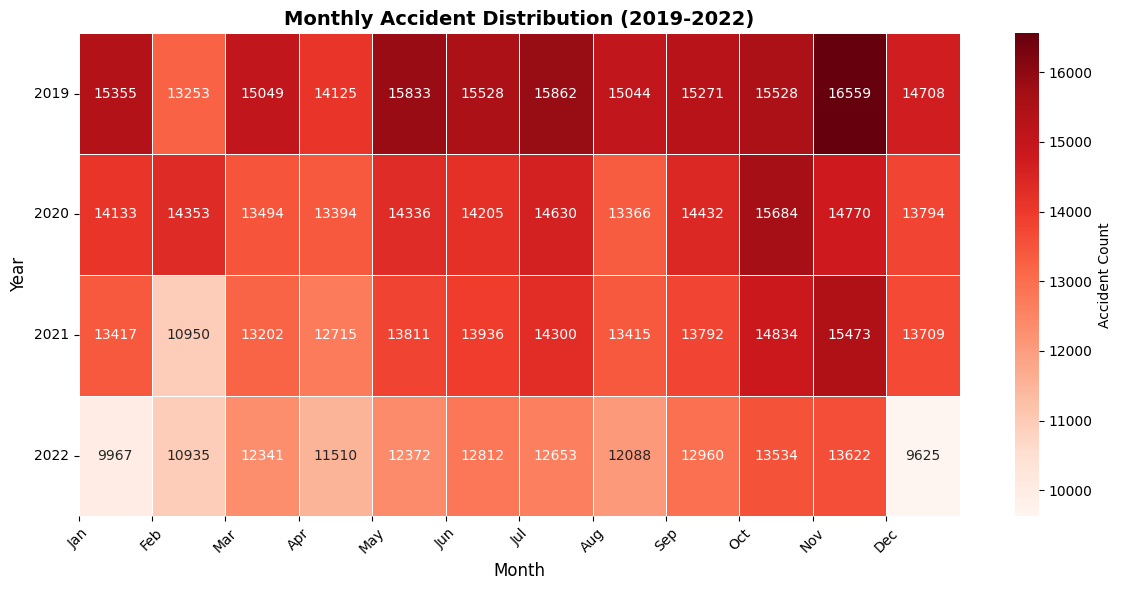

In [49]:
plot_accident_heatmap(accident_perMonth_everyYear)

<h2>Insights on Monthly Accident Trends in the UK (2019-2022)</h2>

<ul>
    <li><b>Autumn Peak:</b> October & November consistently report the highest accident counts across all years.</li>
    <li><b>Lowest Accidents in 2022:</b> Significant drop in accident numbers compared to previous years.</li>
    <li><b>February & December Typically Lower:</b> These months show reduced accident counts, possibly due to winter weather reducing travel frequency.</li>
</ul>


# Q5: Do accidents occur more frequently in daylight or darkness?

In [50]:
# daylight_vs_darkness = eda_data['Light_Conditions'].value_counts()

In [51]:
# daylight_vs_darkness

<h2>Impact of Light Conditions on Accidents</h2>

<ul>
    <li><b>Most Accidents Occur in Daylight: <u>484,880 cases</u></b></li>
    <li><b>Accidents in Lit Darkness: <u>129,335 cases</u></b></li>
    <li><b>Darkness Without Streetlights: <u>37,437 cases</u></b></li>
    <li><b>Unknown Lighting Conditions: <u>6,484 cases</u></b></li>
    <li><b>Darkness with Unlit Streetlights: <u>2,543 cases</u></b></li>
</ul>



In [54]:
uk_darkness['Light_Conditions'].value_counts()

Light_Conditions
Darkness - lights lit          35769
Darkness - no lighting         10842
Darkness - lighting unknown     1768
Darkness - lights unlit          694
Daylight                           0
Name: count, dtype: int64

<h1>Correlation-Based Questions</h1>
<ol>
    <li>Is there a relationship between number of casualties and number of vehicles involved?</li>
    <li>Is there a relationship between the number of vehicles involved and the month?</li>

</ol>

# Q6: Is there a relationship between number of casualties and number of vehicles involved?

In [55]:
rs_in_nc_and_nv = np.round(eda_data['Number_of_Casualties'].corr(eda_data['Number_of_Vehicles']),2)# 

In [56]:
# rs_in_nc_and_nv

<h2>Correlation Between Number of Casualties and Number of Vehicles</h2>

<p><b>Correlation: <u>0.23 (Weak Positive)</u></b></p>
<p>A correlation of 0.23 suggests a weak relationship between the number of vehicles and casualties. This means that while accidents involving more vehicles can result in more casualties, it's not a strong or consistent pattern. Other factors like speed, collision type, and safety measures likely have a greater influence.</p>



# Q7: Is there a relationship between the number of vehicles involved and the month?


In [57]:
month_nov_corr = eda_data['Number_of_Vehicles'].corr(eda_data['Month'])
month_nov_corr


0.0032017632046674733

<ul>
    <li><b>No Strong Relationship Between Month and Vehicles Involved: <u>0.0032 correlation</u></b></li>
    <p>Insights: Seasonal changes and holiday traffic do not significantly impact the number of vehicles involved in accidents.</p>
</ul>


# Q8: How has the number of accidents changed over the years?


In [58]:
eda_data['Year'].value_counts().sort_index()
severity_over_the_years= eda_data.groupby(['Year', 'Accident_Severity']).size().unstack()

In [59]:
severity_over_the_years

Accident_Severity,Fatal,Serious,Slight
Year,,,
2019,2714,24322,155079
2020,2341,23121,145129
2021,2057,21997,139500
2022,1549,18777,124093


<p><strong>Overall accidents have declined</strong> from 2019 to 2022 across all severity levels.</p>
    <ul>
        <li><strong>Fatal accidents:</strong> Dropped by <b>~43%</b> (from <b>2,714</b> in 2019 to <b>1,549</b> in 2022).</li>
        <li><strong>Serious accidents:</strong> Decreased by <b>~23%</b> (from <b>24,322</b> in 2019 to <b>18,777</b> in 2022).</li>
        <li><strong>Slight accidents:</strong> Reduced by <b>~20%</b> (from <b>155,079</b> in 2019 to <b>124,093</b> in 2022).</li>
    </ul>

# Q9: How road surface conditions impact severity in urban vs. rural areas?

In [62]:
severity_rsc_urban_rural = eda_data.groupby(['Road_Surface_Conditions', 'Urban_or_Rural_Area'])['Accident_Severity'].size().unstack()

In [63]:
severity_rsc_urban_rural

Urban_or_Rural_Area,Rural,Unallocated,Urban
Road_Surface_Conditions,,,
Dry,144861,5,302955
Flood over 3cm. deep,785,1,231
Frost or ice,10953,0,7564
Snow,3102,0,2788
Unknown road condition,284,0,442
Wet or damp,79005,5,107698


<h4>Urban vs. Rural Accidents by Road Condition</h4>
    <p><b>Dry roads:</b> Most accidents occur in urban areas (302,955), followed by rural (144,861).</p>
    <p><b>Wet roads:</b> Urban areas (107,698) still lead, but rural accidents (79,005) are high.</p>
    <p><b>Ice & Snow:</b> Rural areas have more ice-related accidents (10,953 vs. 7,564 in urban).</p>
    <p><b>Insights:</b> Rural roads are riskier in winter, while urban areas see more accidents overall.</p>


# Q10: Accident severity on different road types (single vs. dual carriageway)

In [65]:
severity_road_type = eda_data.groupby(['Road_Type', 'Urban_or_Rural_Area'])['Accident_Severity'].size().unstack()

In [66]:
severity_road_type

Urban_or_Rural_Area,Rural,Unallocated,Urban
Road_Type,,,
Dual carriageway,48715,1,50708
One way street,1193,0,12366
Roundabout,15545,1,28446
Single carriageway,168010,9,324124
Slip road,4294,0,2747
Unaccounted,1233,0,3287


<h4>Accidents by Road Type & Location</h4>
<ol>
    <li><b>Single carriageways:</b> Highest accidents in both urban (324,124) & rural (168,010) areas.</li>
    <li><b>Dual carriageways:</b> Urban (50,708) and rural (48,715) accidents are nearly equal.</li>
    <li><b>Roundabouts:</b> More urban accidents (28,446) than rural (15,545).</li>
</ol>

<p><b>Insight:</b> Single carriageways are the most accident-prone in both settings.</p>



# Q11: How light conditions impact accident severity in urban vs. rural areas

In [69]:
severity_lc_urban_rural = eda_data.groupby(['Light_Conditions', 'Urban_or_Rural_Area'])['Accident_Severity'].size().unstack()

In [70]:
severity_lc_urban_rural

Urban_or_Rural_Area,Rural,Unallocated,Urban
Light_Conditions,,,
Darkness - lighting unknown,2467,0,4017
Darkness - lights lit,24695,2,104638
Darkness - lights unlit,961,0,1582
Darkness - no lighting,35517,0,1920
Daylight,175350,9,309521


<h4>Accidents by Light Conditions & Location</h4>
<ol>
    <li><b>Daylight:</b> Most accidents occur in both urban (309,521) & rural (175,350) areas.</li>
    <li><b>Darkness - lights lit:</b> Higher in urban areas (104,638) than rural (24,695).</li>
    <li><b>Darkness - no lighting:</b> Rural areas (35,517) have far more accidents than urban (1,920).</li>
</ol>

<p><b>Insight:</b> Poor lighting increases accident risks, especially in rural areas.</p>


# Q12: Vehicle type involvement in serious vs. fatal accidents (urban vs. rural)

In [72]:
severity_v_urban_rural = uk_data_2019.groupby(['Vehicle_Type', 'Urban_or_Rural_Area'])['Accident_Severity'].size().unstack()

In [73]:
severity_v_urban_rural

Urban_or_Rural_Area,Rural,Unallocated,Urban
Vehicle_Type,,,
Agricultural vehicle,232,0,404
Bus or coach (17 or more pass seats),3672,2,6809
Car,48981,3,81320
Data missing or out of range,0,0,0
Goods 7.5 tonnes mgw and over,2330,0,3917
Goods over 3.5t. and under 7.5t,794,0,1255
Minibus (8 - 16 passenger seats),234,0,391
Motorcycle 125cc and under,1442,0,2871
Motorcycle 50cc and under,790,0,1346


<h4>Accidents by Vehicle Type & Location</h4>
<ol>
    <li><b>Cars:</b> Most involved in accidents in both urban (316,062) & rural (181,922) areas.</li>
    <li><b>Motorcycles over 500cc:</b> Higher accident rates in urban (16,700) than rural (8,957).</li>
    <li><b>Buses & coaches:</b> More accidents in urban (16,851) than rural (9,025).</li>
</ol>

<p><b>Insight:</b> Cars dominate accidents, while motorcycles and buses have higher urban risks.</p>
                                                                                                                                                                                                                                                                                                                                            

# Q13: How does accident frequency vary by district/region?

In [78]:
fre_dis_reg = eda_data.groupby('District Area').size().sort_values(ascending=False)

In [79]:
fre_dis_reg.head(5)

District Area
Birmingham    13491
Leeds          8898
Manchester     6720
Bradford       6212
Sheffield      5710
dtype: int64

<h4>Insights on Accident Frequency by District</h4>

<ol>
    <li><b>Birmingham:</b> Highest accident count (13,491), indicating a major hotspot.</li>
</ol>

# Q14: Do certain road types more prone to accidents under different weather conditions?

In [80]:
road_weather_conditions = uk_data_2019.groupby(['Road_Type', 'Weather_Conditions']).size().unstack()
road_weather_conditions = road_weather_conditions[road_weather_conditions.sum().sort_values(ascending=True).index]


In [81]:
road_weather_conditions

Weather_Conditions,Snowing + high winds,Snowing no high winds,Fog or mist,Fine + high winds,Raining + high winds,Other,Unaccounted,Raining no high winds,Fine no high winds
Road_Type,,,,,,,,,
Dual carriageway,33,122,163,462,628,525,533,3842,21854
One way street,1,6,9,51,47,80,97,400,3122
Roundabout,3,38,62,161,161,276,325,1443,9229
Single carriageway,108,507,608,1823,2078,3107,2778,16736,107153
Slip road,1,6,6,30,31,43,49,257,1551
Unaccounted,0,1,9,18,14,52,352,157,967


<h4>Insight on Weather Impact on Accidents by Road Type</h4>
<ol>
    <li><b>Clear weather dominates:</b> Most accidents occur in fine weather with no high winds, especially on single carriageways (389,830).</li>
    <li><b>Rain increases risk:</b> Over 58,581 accidents happened on wet single carriageways, showing higher risks in rainy conditions.</li>
    <li><b>Snow-related accidents:</b> Single carriageways have the highest snow-related accidents (4,751 in light snow, 642 in high winds).</li>
</ol>

<p><b>Insight:</b> While most accidents occur in clear weather, wet and snowy conditions significantly increase risk, especially on single carriageways.</p>


In [87]:
# road_weather_conditions1 = eda_data.groupby(['Road_Type', 'Weather_Conditions']).size().unstack()
# road_weather_conditions1

# Q15: Which vehicle types are more involved in accidents under different road surface conditions?

In [88]:
vehicle_road_surface = eda_data.groupby(['Vehicle_Type', 'Road_Surface_Conditions']).size().unstack()

In [89]:
vehicle_road_surface

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Unknown road condition,Wet or damp
Vehicle_Type,,,,,,
Agricultural vehicle,1303,8,59,24,1,552
Bus or coach (17 or more pass seats),17604,40,646,214,19,7355
Car,337311,777,14108,4483,549,140764
Data missing or out of range,3,0,1,0,0,2
Goods 7.5 tonnes mgw and over,11690,32,432,147,18,4988
Goods over 3.5t. and under 7.5t,4136,6,162,51,2,1739
Minibus (8 - 16 passenger seats),1355,1,40,16,1,563
Motorcycle 125cc and under,10485,14,420,128,30,4192
Motorcycle 50cc and under,5189,13,224,77,11,2089


<h4>Insight on Vehicle Type & Road Surface Conditions</h4>
<ol>
    <li><b>Cars dominate accidents:</b> The highest number of accidents occur with cars, especially on dry (337,311) and wet roads (140,764).</li>
    <li><b>Motorcycles & poor surfaces:</b> Motorcycles have significant accidents on icy (420-689) and wet roads (4,192-7,233), highlighting their vulnerability.</li>
    <li><b>Buses & larger vehicles:</b> Buses and heavy goods vehicles show notable accidents on wet roads (7,355 for buses, 4,988 for heavy goods).</li>
</ol>

<p><b>Insight:</b> While most accidents occur on dry roads, wet and icy conditions significantly

# Q16: What is the relationship between vehicle type and light conditions during accidents?

In [94]:
vehicle_light = eda_data.groupby(['Vehicle_Type', 'Light_Conditions']).size().unstack()

In [95]:
vehicle_light

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Vehicle_Type,,,,,
Agricultural vehicle,19,365,7,113,1443
Bus or coach (17 or more pass seats),267,5142,112,1427,18930
Car,4914,96994,1933,28385,365766
Data missing or out of range,0,1,0,0,5
Goods 7.5 tonnes mgw and over,185,3440,67,963,12652
Goods over 3.5t. and under 7.5t,59,1192,16,367,4462
Minibus (8 - 16 passenger seats),20,347,4,121,1484
Motorcycle 125cc and under,136,3074,50,794,11215
Motorcycle 50cc and under,68,1494,26,424,5591


In [98]:
test_eda_data = eda_data.copy()

severity_district_road = test_eda_data.groupby(['District Area', 'Road_Type'])['Accident_Severity'].size().unstack()
severity_district_road['Total'] = severity_district_road.sum(axis=1) 
severity_district_road = severity_district_road.sort_values(by='Total', ascending=False) 


In [99]:
severity_district_road.head(10)

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,Unaccounted,Total
District Area,,,,,,,
Birmingham,3039,321,1008,9018,98,7,13491
Leeds,1900,207,432,6152,161,46,8898
Manchester,1181,170,189,4908,59,213,6720
Bradford,707,53,231,5155,36,30,6212
Sheffield,1035,137,387,4060,41,50,5710
Westminster,830,367,141,4351,6,11,5706
Liverpool,1801,154,173,3403,34,22,5587
Glasgow City,1585,366,133,2700,88,70,4942
"Bristol, City of",441,177,353,3797,40,11,4819


<h4>Insight on  Accidents by District & Road Type</h4>
<ol>
    <li><b>Birmingham leads with the highest accidents (13,491):</b> Single carriageways (9,018) are the most dangerous.</li>
    <li><b>Leeds (8,898) and Manchester (6,720) follow:</b> Single carriageways account for most accidents.</li>
    <li><b>Westminster stands out:</b> More accidents on one-way streets (367) compared to other districts.</li>
</ol>

<p><b>Insight:</b> Single carriageways consistently have the most accidents across districts, especially in Birmingham.</p>


# Q17: Are accidents more severe on weekends or weekdays?


In [100]:
eda_data.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Year', 'Month', 'Day'],
      dtype='object')

In [101]:
uk_data_2019['dayofweek'] = uk_data_2019['Accident Date'].dt.dayofweek
severity_by_day = uk_data_2019.groupby(['dayofweek','Accident_Severity']).size().unstack()
severity_by_day

C:\Users\JOMARIE\AppData\Local\Temp\ipykernel_3272\4239550937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data_2019['dayofweek'] = uk_data_2019['Accident Date'].dt.dayofweek


Accident_Severity,Fatal,Serious,Slight
dayofweek,,,
0,399,3264,16723
1,387,3314,22550
2,370,3384,23173
3,344,3411,23545
4,365,3472,23466
5,383,3921,24958
6,466,3556,20664


<h4>Insight on Accidents by Day of the Week</h4>
<ol>
    <li><b>Weekends (Saturday & Sunday):</b> Higher fatal accidents, peaking on Saturday (1,522).</li>
    <li><b>Weekdays:</b> Higher total accident counts, with slight injuries peaking on Friday (84,154).</li>
    <li><b>Saturday:</b> Stands out with both high fatalities (1,522) and serious injuries (13,074).</li>
</ol>

<p><b>Insight:</b> Fatal accidents are more frequent on weekends, while slight accidents are higher on weekdays, likely due to weekday commuting patterns.</p>


# Q18: What is the most common combination of road type and weather condition in fatal accidents?


In [103]:
fatal_road_weather = eda_data[eda_data['Accident_Severity'] == 'Fatal']
common_road_weather = fatal_road_weather.groupby(['Road_Type', 'Weather_Conditions']).size().unstack()

In [104]:
common_road_weather

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,Unaccounted
Road_Type,,,,,,,,,
Dual carriageway,32,1461,24,32,39,191,2,9,25
One way street,5,81,0,1,1,5,0,0,2
Roundabout,5,121,3,0,1,9,0,1,2
Single carriageway,133,5375,54,128,103,634,1,25,74
Slip road,0,37,0,2,1,9,0,0,0
Unaccounted,0,25,1,2,0,0,0,1,4


<h4>Insights on Most Common Combination of Road Type and Weather Condition in Fatal Accidents</h4>
<ol>
    <li><strong>Single Carriageway + Fine No High Winds:</strong> 5,375 fatal accidents.</li>
    <li><strong>Dual Carriageway + Fine No High Winds:</strong> 1,461 fatal accidents.</li>
    <li><strong>Single Carriageway + Raining No High Winds:</strong> 634 fatal accidents.</li>
    <li><strong>Dual Carriageway + Raining No High Winds:</strong> 191 fatal accidents.</li>
    <li><strong>Single Carriageway + Fine + High Winds:</strong> 133 fatal accidents.</li>
</ol>
<p>Fine weather conditions with no high winds account for the highest number of fatal accidents, particularly on single and dual carriageways. Wet conditions also contribute significantly, especially on single carriageways.</p>


# 19: Which light conditions are associated with the highest number of multi-vehicle accidents?


In [105]:

multi_vehicle_accidents = eda_data[eda_data['Number_of_Vehicles'] > 2]
light_condition_accidents = multi_vehicle_accidents['Light_Conditions'].value_counts()
light_condition_accidents

Light_Conditions
Daylight                       52237
Darkness - lights lit          11310
Darkness - no lighting          3602
Darkness - lighting unknown      515
Darkness - lights unlit          233
Name: count, dtype: int64

<h4>Light Conditions Associated with the Highest Number of Multi-Vehicle Accidents</h4>
<ol>
    <li><strong>Daylight:</strong> 52,237 accidents.</li>
    <li><strong>Darkness - Lights Lit:</strong> 11,310 accidents.</li>
    <li><strong>Darkness - No Lighting:</strong> 3,602 accidents.</li>
    <li><strong>Darkness - Lighting Unknown:</strong> 515 accidents.</li>
    <li><strong>Darkness - Lights Unlit:</strong> 233 accidents.</li>
</ol>
<p>Multi-vehicle accidents are most common in daylight, likely due to increased traffic volume. However, accidents in darkness with streetlights also occur frequently, emphasizing the role of visibility.</p>


# Q20: Is there a correlation between accident severity and the number of casualties?

In [106]:
severity_casualties_corr = test_eda_data['Accident_Severity'].astype('category').cat.codes.corr(test_eda_data['Number_of_Casualties'])
severity_casualties_corr

-0.08788637762883386

<h4>Insight on Accident Severity and Number of Casualties</h4>
<ol>
    <li>The correlation value is <b>-0.088</b>, which is very close to zero.</li>
    <li>This suggests that there is <b>little to no direct relationship</b> between accident severity and the number of casualties.</li>
    <li>In other words, accidents with more casualties do not necessarily mean they are more severe, and vice versa.</li>
    <li>Other factors like vehicle type, road conditions, or impact force may influence accident severity more than just the number of casualties.</li>
</ol>


# Q21: How does light condition affect road accident severity in 2019?


In [107]:
uk_data_2019 = eda_data[eda_data['Year'] == 2019]
uk_data_2020 = eda_data[eda_data['Year'] == 2020]
uk_data_2021 = eda_data[eda_data['Year'] == 2021]
uk_data_2022 = eda_data[eda_data['Year'] == 2022]

In [108]:
severity_lightConditons_2019 = uk_data_2019.groupby(['Accident_Severity','Light_Conditions']).size().unstack().T

In [109]:
severity_lightConditons_2019

Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,20,215,1533
Darkness - lights lit,559,5460,29750
Darkness - lights unlit,14,104,576
Darkness - no lighting,512,2096,8234
Daylight,1609,16447,114986


<h4>Accident Severity and Light Conditions (2019)</h4>

<p>In 2019, fatal accidents mostly occurred in darkness, with 1,105 cases making up 72%, including 559 on lit roads (25%) and 512 on no lighting roads (23%). Serious accidents followed this trend with 7,675 cases or 68%, while slight accidents were more common in daylight with 114,986 cases or 73%, Unlit roads remained a major risk, causing 512 fatal crashes or 23%.</p>


# Q22 How Does Weather affect Road Accident Severity in 2019?

In [110]:
uk_weather_2019 = uk_data_2019['Weather_Conditions'].value_counts()

In [111]:
uk_weather_2019

Weather_Conditions
Fine no high winds       143876
Raining no high winds     22835
Unaccounted                4134
Other                      4083
Raining + high winds       2959
Fine + high winds          2545
Fog or mist                 857
Snowing no high winds       680
Snowing + high winds        146
Name: count, dtype: int64

<h4>Impact of Weather Conditions on Road Accidents (2019)</h4>
<p>In 2019, most accidents occurred in fine weather without high winds, with 143,876 cases making up 81% of all incidents. Rainy conditions contributed to 25,794 accidents, 13% of the total, with 2,959 involving high winds. Fog and mist accounted for 857 accidents, while snow-related conditions were the least common, with 826 cases (0.5%). Unaccounted and other weather conditions made up 4,134 and 4,083 cases, respectively.</p>


# Q23 Are accidents more likely to occur on wet or dry road surfaces?


In [112]:
uk_data_2019.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Year', 'Month', 'Day'],
      dtype='object')

In [113]:
uk_data_2019['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                       125348
Wet or damp                53153
Frost or ice                2569
Snow                         534
Flood over 3cm. deep         312
Unknown road condition       199
Name: count, dtype: int64

<h4>Impact of Road Surface Conditions on Accidents (2019)</h4>
<p>In 2019, most accidents occurred on dry roads, with <b>125,348</b> cases making up <b>69%</b> of incidents, while wet or damp conditions accounted for <b>53,153</b> accidents, or <b>29%</b>.</p>


In [114]:
dry_road_2019 = uk_data_2019[uk_data_2019['Road_Surface_Conditions'] == 'Dry'].count()
dry_road_2019

Index                      125348
Accident_Severity          125348
Accident Date              125348
Latitude                   125348
Light_Conditions           125348
District Area              125348
Longitude                  125348
Number_of_Casualties       125348
Number_of_Vehicles         125348
Road_Surface_Conditions    125348
Road_Type                  125348
Urban_or_Rural_Area        125348
Weather_Conditions         125348
Vehicle_Type               125348
Year                       125348
Month                      125348
Day                        125348
dtype: int64

In [115]:
dry_road_severity = uk_data_2019[uk_data_2019['Road_Surface_Conditions'] == 'Dry'].groupby('Accident_Severity').size()

In [116]:
dry_road_severity

Accident_Severity
Fatal        1850
Serious     17181
Slight     106317
dtype: int64

<h4>Accident Severity on Dry Roads (2019)</h4>
<p>In 2019, <b>85%</b> of accidents on dry roads were slight (<b>106,317 cases</b>), while <b>14%</b> were serious (<b>17,181 cases</b>). Fatal accidents were relatively low at <b>1%</b> (<b>1,850 cases</b>).</p>


In [117]:
wet_road_2019 = uk_data_2019[uk_data_2019['Road_Surface_Conditions'] == 'Wet or damp'].groupby('Accident_Severity').size()
wet_road_2019

Accident_Severity
Fatal        826
Serious     6734
Slight     45593
dtype: int64

<h4>Accident Severity on Wet or Damp Roads (2019)</h4>
<p>In 2019, <b>86%</b> of accidents on wet or damp roads were slight (<b>45,593 cases</b>), while <b>13%</b> were serious (<b>6,734 cases</b>). Fatal accidents were relatively low at <b>1%</b> (<b>826 cases</b>).</p>


# Q24: What is the average number of casualties per accident?


In [118]:
uk_data_2019.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Year', 'Month', 'Day'],
      dtype='object')

In [119]:
casualties_per_accidents = np.round(uk_data_2019['Number_of_Casualties'].mean(),2)

In [120]:
casualties_per_accidents

1.36

<h4>Average Casualties per Accident (2019)</h4>
<p>In 2019, each road accident in the UK resulted in an average of <b>1.36 casualties</b>. </p>


# Q24: What is the average number of Vehicles per accident?


In [121]:
casualties_per_accidents = np.round(uk_data_2019['Number_of_Vehicles'].mean(),2)

In [122]:
casualties_per_accidents

1.84

<h4>Average Number of Vehicles per Accident (2019)</h4>
<p>In 2019, each road accident in the UK resulted in an average of <b>1.84 cases</b>. </p>

<h1>Motorcyles Insights</h1>

In [123]:
uk_data_2019['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      130304
Bus or coach (17 or more pass seats)      10483
Van / Goods 3.5 tonnes mgw or under        9303
Motorcycle over 500cc                      7686
Goods 7.5 tonnes mgw and over              6247
Motorcycle 125cc and under                 4313
Taxi/Private hire car                      4230
Motorcycle over 125cc and up to 500cc      2446
Motorcycle 50cc and under                  2136
Goods over 3.5t. and under 7.5t            2049
Other vehicle                              1588
Agricultural vehicle                        636
Minibus (8 - 16 passenger seats)            625
Pedal cycle                                  68
Ridden horse                                  1
Data missing or out of range                  0
Name: count, dtype: int64

In [124]:
motorcycle_accidents = uk_data_2019[uk_data_2019['Vehicle_Type'].str.contains('Motorcycle', na=False)]
motorcycle_counts = motorcycle_accidents['Vehicle_Type'].value_counts()
motorcycle_counts



Vehicle_Type
Motorcycle over 500cc                    7686
Motorcycle 125cc and under               4313
Motorcycle over 125cc and up to 500cc    2446
Motorcycle 50cc and under                2136
Agricultural vehicle                        0
Bus or coach (17 or more pass seats)        0
Car                                         0
Data missing or out of range                0
Goods 7.5 tonnes mgw and over               0
Goods over 3.5t. and under 7.5t             0
Minibus (8 - 16 passenger seats)            0
Other vehicle                               0
Pedal cycle                                 0
Ridden horse                                0
Taxi/Private hire car                       0
Van / Goods 3.5 tonnes mgw or under         0
Name: count, dtype: int64

# Q25: Which type of motorcycle is most frequently involved in accidents?


In [125]:
large_motorcycles = uk_data_2019[uk_data_2019['Vehicle_Type'] == 'Motorcycle over 500cc'].shape[0]
small_motorcycles = uk_data_2019[uk_data_2019['Vehicle_Type'].isin(['Motorcycle 50cc and under', 
                                                                     'Motorcycle 125cc and under'])].shape[0]
print(f"Large Motorcycle Accidents: {large_motorcycles}, Small Motorcycle Accidents: {small_motorcycles}")


Large Motorcycle Accidents: 7686, Small Motorcycle Accidents: 6449


<h4>Comparison of Large and Small Motorcycle Accidents (2019)</h4>
<p>In 2019, large motorcycles (500cc+) were involved in <b>7,686</b> accidents, while smaller motorcycles (125cc and below) accounted for <b>6,449</b> accidents.</p>


# Are accidents involving larger motorcycles (500cc+) more likely to be fatal or serious?

In [126]:
large_motorcycle_severity = uk_data_2019[uk_data_2019['Vehicle_Type'] == 'Motorcycle over 500cc'].groupby('Accident_Severity').size()
large_motorcycle_severity


Accident_Severity
Fatal       107
Serious    1052
Slight     6527
dtype: int64

<h4>Accident Severity for Large Motorcycles (2019)</h4>
<p>In 2019, large motorcycles (500cc+) were involved in <b>6,527</b> slight accidents (<b>86%</b>), <b>1,052</b> serious accidents (<b>14%</b>), and <b>107</b> fatal accidents (<b>1%</b>).</p>


In [127]:
motorcycles_on_rural_and_urban = motorcycle_accidents.groupby('Urban_or_Rural_Area')['Vehicle_Type'].size()

In [128]:
motorcycles_on_rural_and_urban

Urban_or_Rural_Area
Rural           5842
Unallocated        0
Urban          10739
Name: Vehicle_Type, dtype: int64

<h4>Motorcycle Accidents in Rural and Urban Areas (2019)</h4>
<p>In 2019, urban areas accounted for <b>10,739</b> motorcycle accidents (<b>65%</b>), while rural areas had <b>5,842</b> accidents (<b>35%</b>).</p>


In [129]:
district_motorcycle_accidents = motorcycle_accidents.groupby('District Area').size().sort_values(ascending=False)
print(district_motorcycle_accidents.head(5))  

District Area
Birmingham                349
Westminster               295
Leeds                     214
Kensington and Chelsea    191
Camden                    156
dtype: int64


<h4>Top 5 Districts for Motorcycle Accidents (2019)</h4>
<p>Birmingham had the highest number of motorcycle accidents with <b>349</b> cases (<b>2.1%</b>), followed by Westminster with <b>295</b> (<b>1.8%</b>). Leeds recorded <b>214</b> accidents (<b>1.3%</b>), while Kensington and Chelsea had <b>191</b> (<b>1.2%</b>). Camden ranked fifth with <b>156</b> accidents (<b>0.9%</b>).</p>
